In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
movie = pd.read_csv('./data/IMDB-Movie-Data.csv')

# 问题1：我们想知道这些电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取？

In [7]:
# 评分平均分
print("评分平均分",movie['Rating'].mean())

评分平均分 6.723200000000003


In [12]:
len(np.unique(movie['Director']))

644

In [14]:
np.unique(movie['Director']).shape[0]

644

In [5]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# 问题2：对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据？

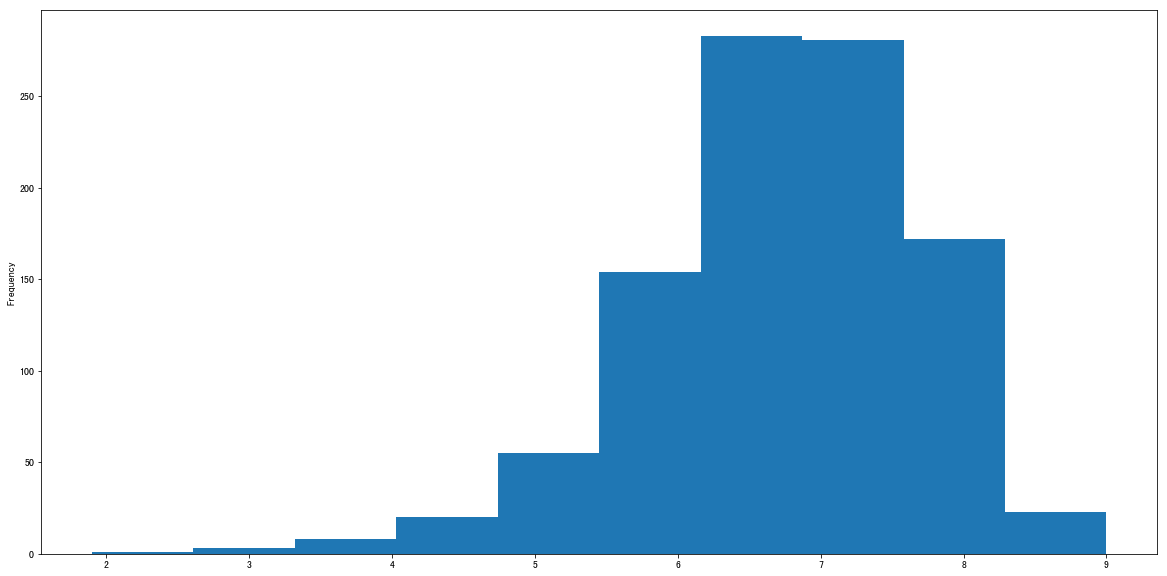

In [17]:
movie['Rating'].plot(kind = 'hist',figsize = (20,10))

In [33]:
# 构造x轴刻度
max_ = movie['Rating'].max()
min_ = movie['Rating'].min()

In [34]:
t1 = np.linspace(max_,min_,21)

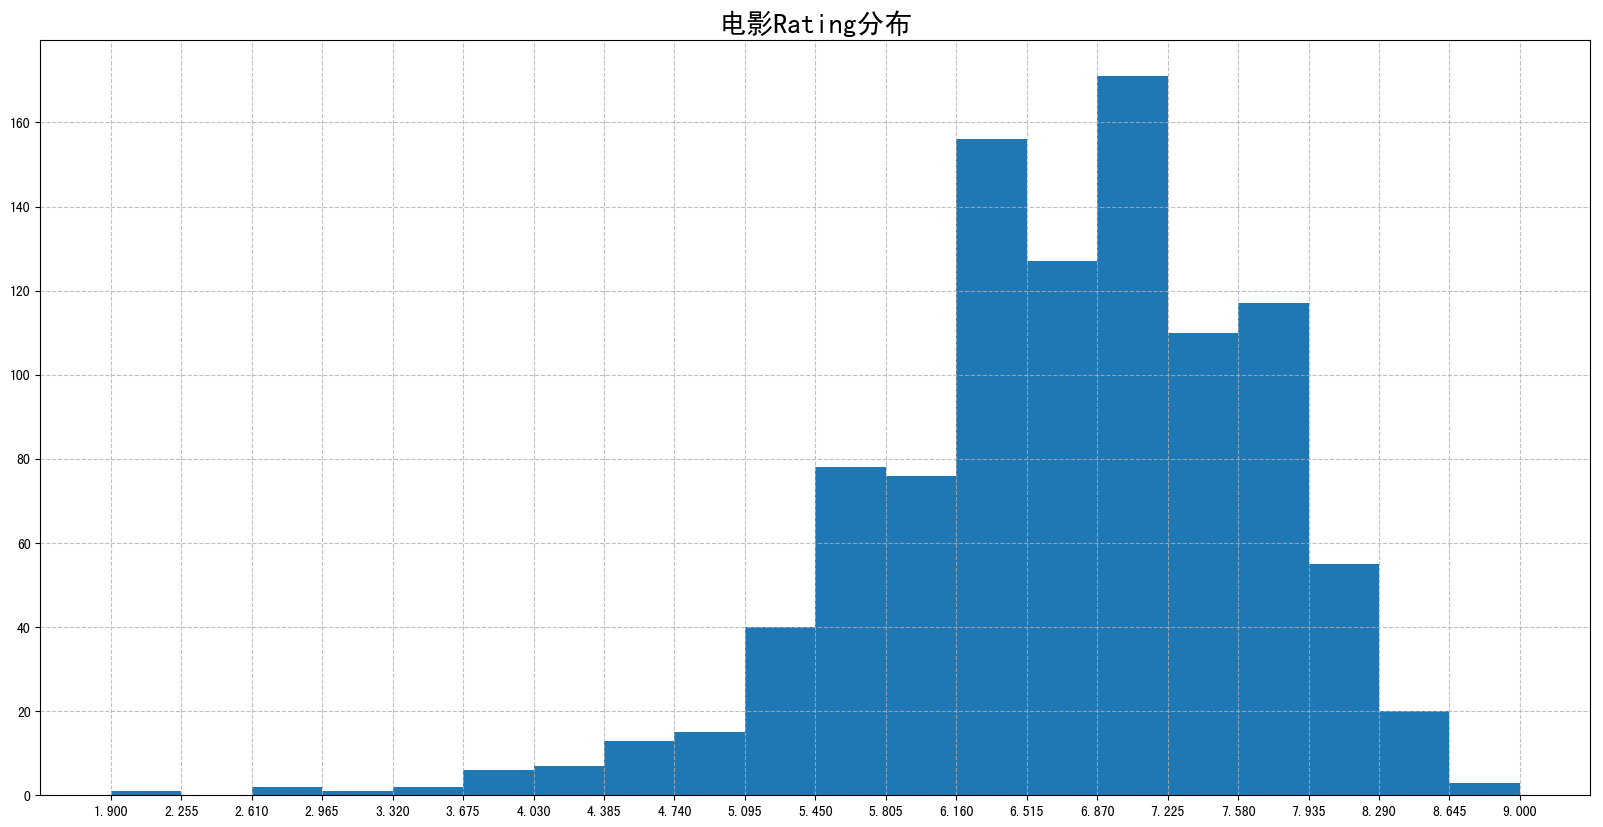

In [36]:
# 1. 创建画布
plt.figure(figsize=(20,10),dpi=100)
# 2. 绘制直方图
plt.hist(movie['Rating'],bins=20)
# 2.1 修改刻度
plt.xticks(t1)
# 2.2 网格
plt.grid(True,alpha=0.8,linestyle='--')
#2.3 加上title
plt.title("电影Rating分布",fontsize=20)
# 3. 显示图像
plt.show()

In [27]:
# 构造刻度
min_ = movie['Runtime (Minutes)'].min()
max_ = movie['Runtime (Minutes)'].max()
t1 = np.linspace(max_,min_,21)

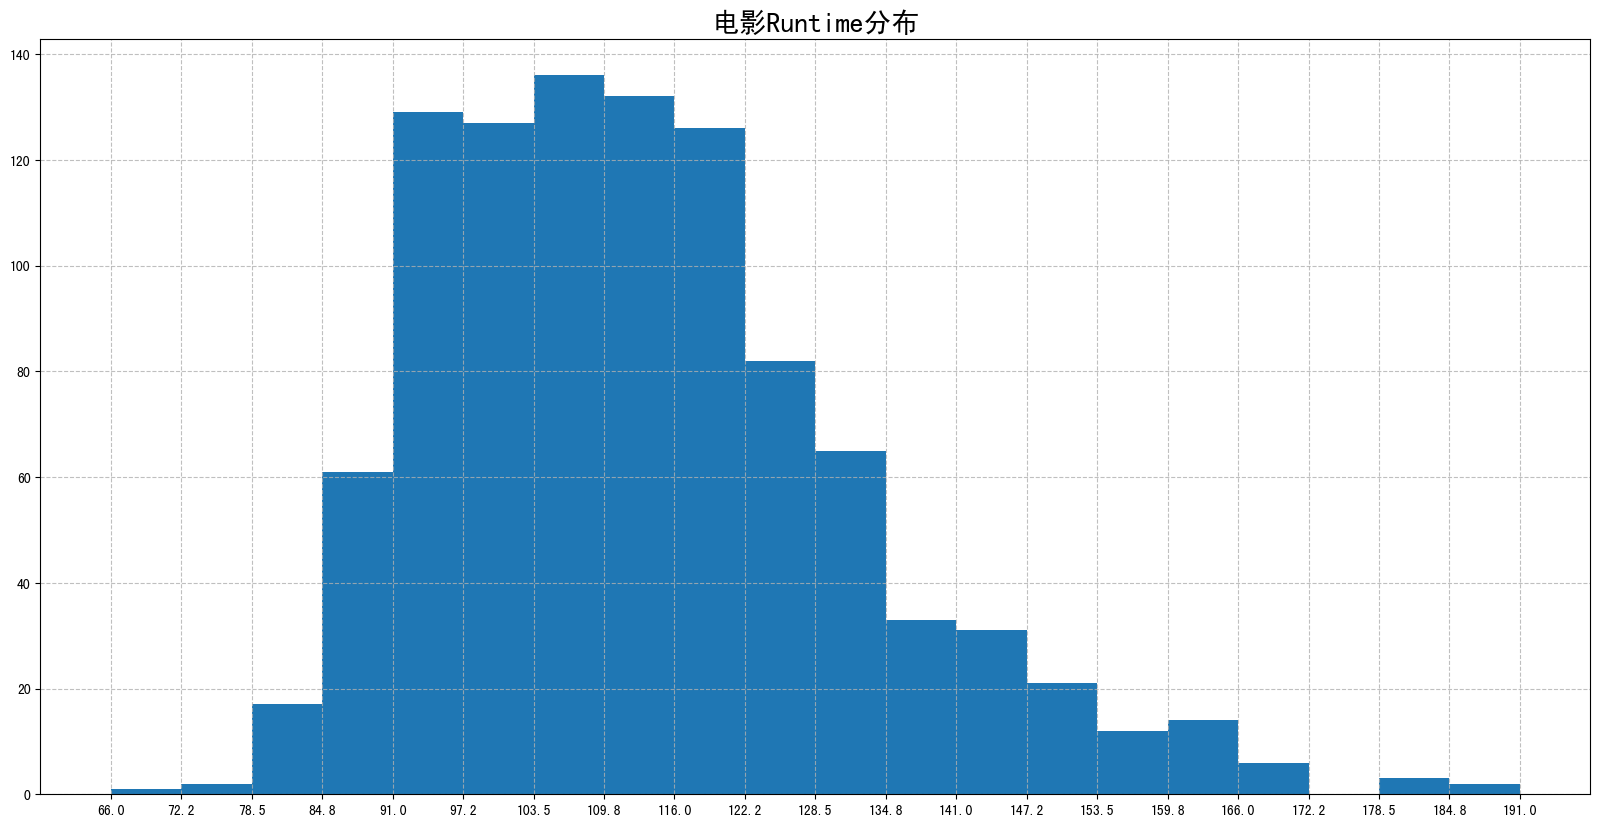

In [31]:
# 创建画布
plt.figure(figsize=(20,10),dpi=100)
# 绘制图像
plt.hist(movie['Runtime (Minutes)'],bins=20)
# 修改刻度
plt.xticks(t1)
plt.grid(True,alpha =0.8 ,linestyle ='--')
# 加上title
plt.title('电影Runtime分布',fontsize=20)
# 显示图像
plt.show()

# 对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据？

In [37]:
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [41]:
temp_list = [i.split(',') for i in movie['Genre']]

In [47]:
movie_list = np.unique([i for j in temp_list for i in j])

In [52]:
# 构建空表
temp = pd.DataFrame(np.zeros([movie.shape[0],movie_list.shape[0]]),columns=movie_list)

In [54]:
for i in range(movie.shape[0]):
    temp.ix[i,temp_list[i]] = 1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


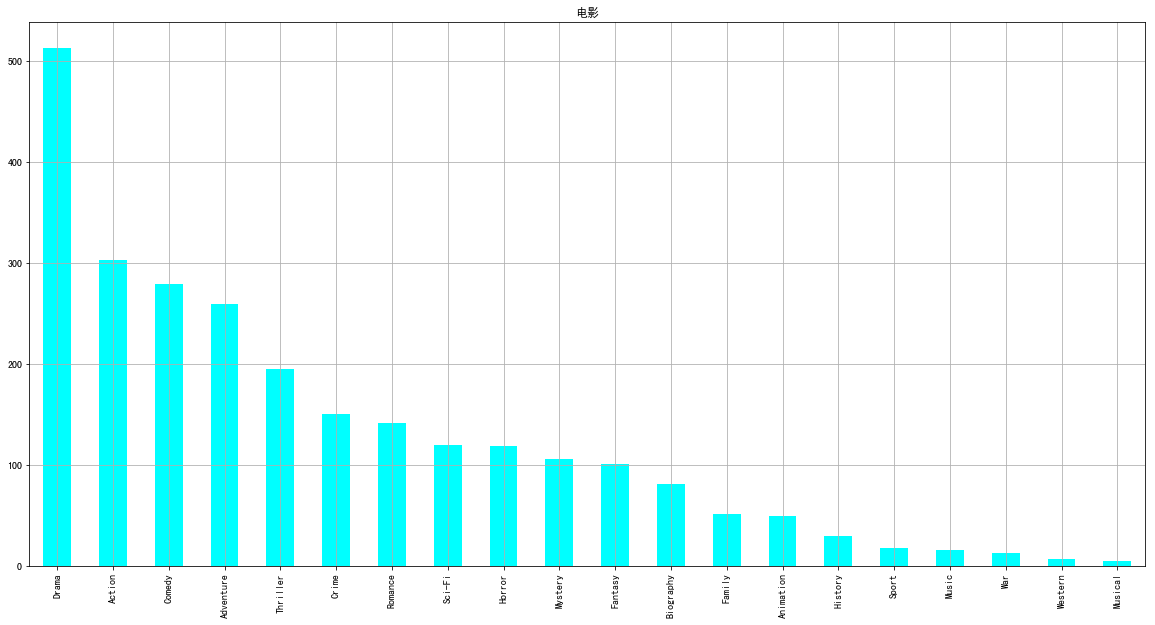

In [67]:
temp.sum().sort_values(ascending=False).plot(kind='bar',figsize=(20,10),title = "电影",grid=True,colormap="cool")

In [48]:
movie.shape[0]

1000

In [49]:
movie_list.shape[0]

20

In [53]:
temp_list[0]

['Action', 'Adventure', 'Sci-Fi']